<img width=300 src="https://camo.githubusercontent.com/9f609b65162567643c396ef42e9ccc2f755906847714389cbc1dcd707b234ebb/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f7374617469632f6c6f676f325f636f6d707265737365642e7376673f7261773d74727565"></img>

# Day-19 Python 資料視覺化工具與常見統計圖表介紹

* 教學目標：主要說明 matplotlib 的基礎操作
  1. 使用常見的子圖與軸圖來做畫面配置
  2. 等高線圖
* 範例重點
  * 了解資料視覺化應用
  * 常見的統計圖形之使用情境與時機
  * 如何使用亂數, 資料集來操作

## 匯入套件

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 資料視覺化的好處

有效的視覺化可以幫助用戶分析和推理資料和證據。它使複雜的資料更容易理解、理解和使用。—— Wikipedia 

為了要將資料視覺化所需的前置工作：
* 制定好主題以及清楚目的
* 釐清測量尺度
* 準確的資料處理與探勘

情境：
* 利用熱點圖可看出在Deep learning 的 model 在圖片中哪部分特徵較為重要
* 在降維後將資料視覺化看資料空間的分布，進而決定分析的下一步該如何優化
* 數據呈現成果，以利於表達資料處理結果可用來篩選及醒目提示資料並將複雜、龐大的數據利用長條圖或圓餅圖等方式呈現

Python資料視覺化主要套件：
* 靜態
  * Matplotlib
    * 是一個最基礎的Python 可視化庫
    * 作圖風格接近 MATLAB
    * 一般都是從 matplotlib 上手 Python 數據可視化，然後開始做縱向與橫向拓展
    * matplotlib 的圖像都位於 Figure 物件中
    * 套件：
      * 基礎的套件：經典圖表(直方、分箱、…)、多重子圖表(subplot)
      * 其他圖型：密度圖、等高線圖
  * Seaborn 
    * 基於 matplotlib 的進階視覺化效果庫
    * 可用短小的代碼去繪製描述更多維度資料的可視化效果圖
    * 可搭配 Matplotlib 建構更直觀的視覺化效果
  * Plotly
    * 用於繪製互動式圖表的工具庫，基於React、Flask，可於Juputer Notebook 進行線上或離線繪圖，支援Python、MATLAB 和 R 等許多語言
    * 具備高互動性的圖表以及版面
    * 將複雜的圖表，用簡單的語法呈現出來
* 動態
  * Bokeh (類似於 D3.js)
    * 交互資訊可視化的工具
    * 用於做瀏覽器端交互可視化的庫，實現分析師與數據的交互
    * 不再需要編輯 HTML 與 JavaScript 便能製作網頁前端視覺化
  * Basemap
    * 地理資訊數據
    * 傳統的 matplotlib/seaborn、互動屬性的 bokeh 可能無法很好地對這類數據進行處理

## Matplotlib

### 安裝

* 使用 python 安裝
  * Python -m pip install -U pip
  * Python -m pip install -U matplotlib
* 在 jupyter cell 安裝
  * !pip install matplotlib
* 在 Anaconda 安裝
  * conda install matplotlib
  * 確認是否安裝成功：conda list

### 操作方式

在 Matplotlib 有兩種主要的操作方式，分別為：
* Matplotlib 的全域 pyplot 模組互動操作
  * 若是只有一張圖可以以下語法操作
    ```
    import matplotlib.pyplot as plt 
    ```
  * 完整指令
    ``` 
    matplotlib.pyplot.plot(args, scalex=True, scaley=True, data=None, kwargs)
    ```
    * `args`：x、y的特徵
    * `kwargs`：指定線標籤、線寬、標記面顏色等屬性設定
* 物件導向形式的操作方式
  * 若是有多張圖的話，透過控制 figure (*.SVG)和 axis (資料維度) 來操作。其中 figure 和全域 pyplot 部分屬性相同。例如： fig.text() 對應到 plt.fig_text()

### 優缺點

* 優點
  * Matplotlib 為歷史最悠久之視覺化套件
  * 對於圖面的需求來說有足夠的彈性調整
* 缺點
  * 圖表呈現較為單調
  * 畫圖指令複雜
  * Series 和 DataFrame 只能使用 matplotlib 的 plot() 方法生成各類圖表[1](https://blog.csdn.net/hustqb/article/details/54410670)

#### 折線圖

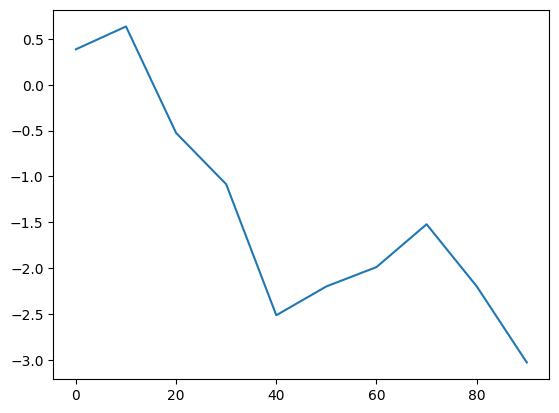

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()
plt.show()

#### 柱面圖

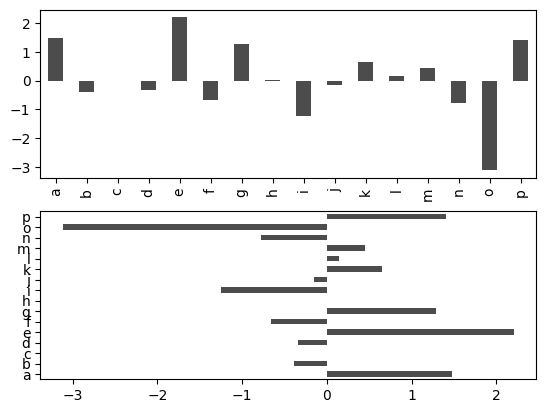

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)
plt.show()

### 常用類型

#### Plot

* 指令
```
plot(x, y, data=data, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
```
其中
* x、y：特徵或數據
* data：dataframe
* color：標記顏色
  
| 顏色字元 | 說明 | 顏色字元 | 說明 |
|---------|:----:|:-------:|:----:|
| 'b' | blue | 'm' | magenta |
| 'g' | green | 'y' | yellow |
| 'r' | red | 'k' | black |
| 'c' | cyan | 'w' | white |
| '#008000' | 'RGB色碼' | '0.8' | 灰度值字串 |

* maker：標記的型態

| 標記字元 | 說明 | 標記字元 | 說明 | 標記字元 | 說明 |
|---------|:----:|:-------:|:----:|:-------:|:----:|
| '.' | 點 | 'D' | 菱形 | 'h' | 豎六邊形 |
| ',' | 像素(小點) | 'd' | 長菱形 | 'H' | 橫六邊形 |
| 'o' | 實心圈 | '|' | 垂直線 | '+' | 十字 |
| 'v' | 倒三角 | '1' | 下花三角 | 'x' | x |
| '^' | 上三角 | '2' | 上花三角 | 's' | 實心方形 |
| '>' | 右三角 | '3' | 左花三角 | 'p' | 實心五角 |
| '<' | 左三角 | '4' | 右花三角 | `'*'` | 星形 |
    
* linestyle：線條的型態
  
| 風格字元 | 說明 | 風格字元 | 說明 |
|---------|:----:|:-------:|:----:|
| '-' | 實線 | ':' | 虛線 |
| '—' | 破折線 | '"' | 無線條 |
| '-.' | 點劃線 | | |
    
* linewidth：線寬
* markersize：標記的大小

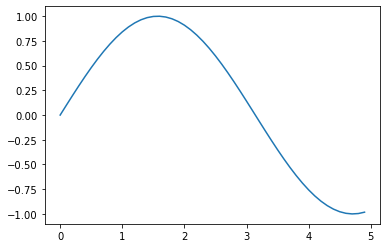

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show()

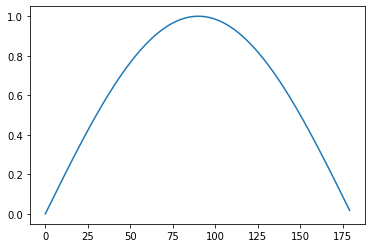

In [ ]:
# 準備數據 ... 假設我要畫一個sin波 從0~180度
x = np.arange(0,180)
y = np.sin(x * np.pi / 180.0)

# 開始畫圖
# 設定要畫的的x,y數據list....
plt.plot(x,y)

# 在這個指令之前，都還在做畫圖的動作  
# 這個指令算是 "秀圖"
plt.show() 

##### `lim`

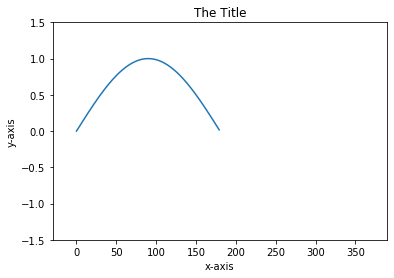

In [ ]:
# 準備數據 ... 假設我要畫一個sin波 從0~180度
x = np.arange(0,180)
y = np.sin(x * np.pi / 180.0)

# 開始畫圖
# 設定要畫的的x,y數據list....

plt.plot(x,y)
# 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(-30,390)
plt.ylim(-1.5,1.5)

# 照需要寫入x 軸和y軸的 label 以及title

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('The Title') 

# 在這個指令之前，都還在做畫圖的動作
# 這個指令算是 "秀圖"
plt.show()

##### plot：marker + linestyle + linewidth

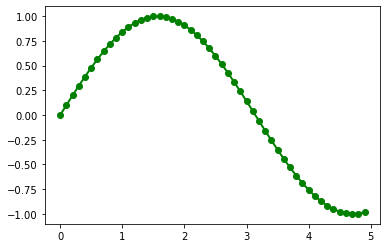

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y, 'go-', label='line 1', linewidth=2)
plt.show()

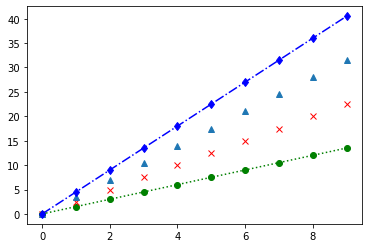

In [ ]:
x = np.arange(10)
plt.plot(x, x*1.5, 'go:'
         , x, x*2.5, 'rx'
         , x, x*3.5, '^'
         , x, x*4.5, 'bd-.')
plt.show()

#### Figure

* 指令
```
figure(num = None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, kwargs)
```
* 參數說明<br>

| 參數 | 型態 | 意義 | 預設值 |
|------|:----:|:----:|:----:|
| num | Integer(string) | 設定圖號 | 會自動給予 |
| figsize | tuple | 設定圖形長寬(英吋) | figsize=(8,6) |
| dpi | interger | 解析度(revolution) | dpi=800 |
| facecolor | | 背景顏色 | |
| edgecolor | | 邊線顏色 | |
| frameon | Boolean/None | 設定邊框 | TRUE |


##### `figure` + `label` + `title`

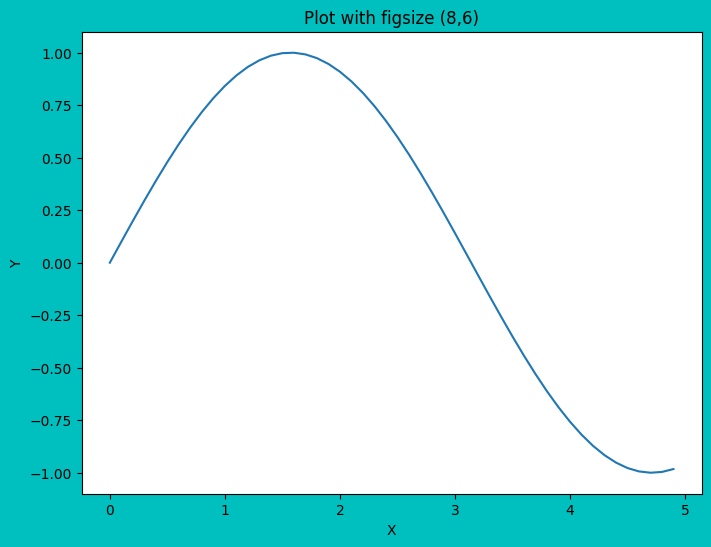

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)

plt.figure(figsize=(8,6),
           facecolor='c')

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with figsize (8,6)')
plt.show()

#### Subplot

* 指令
```
subplot(nrows, ncols, index, kwargs)
```
* 參數說明<br> 

| 參數 | 型態 | 意義 | 預設值 |
|------|:----:|:----:|:----:|
| nrows | integer/string | 設定列數 | 小於等於10欄時，使用subplot(2,2,1)/subplot(221) |
| ncols | tuple | 設定欄數 | 同nrows |
| nindex | integer | 子圖序號 | 同nrows |
| facecolor | | 背景顏色 | 同colors |
| polar | boolean/None | 極座標圖 | |
| projection | string | 投影設定 | 同projections |

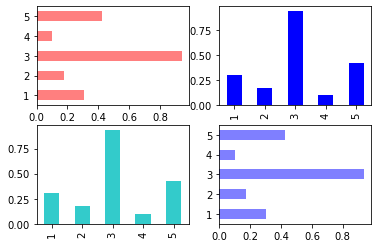

In [ ]:
fig, axes = plt.subplots(2, 2) # 建立 2*2 多維視窗 
data = pd.Series(np.random.rand(5), index=list('12345'))

#ax為選擇畫圖視窗，color為顏色，alpha為透明度設定    
data.plot.bar(ax=axes[0,1], color='b', alpha = 1) 
data.plot.barh(ax=axes[1,1], color='b', alpha=0.5)
data.plot.bar(ax=axes[1,0], color='c', alpha = 0.8) 
data.plot.barh(ax=axes[0,0], color='r', alpha=0.5)
 
plt.show()

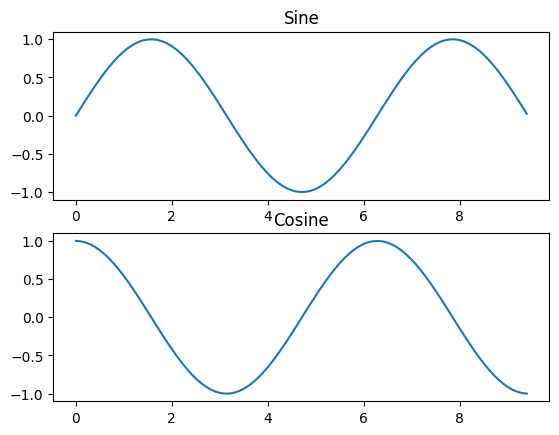

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 設定雙格畫板大小
plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title('Sine')

# 設定雙格畫板大小
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

plt.show()

## 散點圖：Scatter Plots   

* 適用：呈現相關數值間的關係
* 實際應用：性別與體重的關係
* 函數：.plot.scatter()

* 指令
```
scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, kwargs)
```
* 參數說明<br> 

| 參數 | 意義 | 預設值 | 參數|
|------|:----:|:----:|:----:|
| x,y | 數值 | | |
| s | 尺度 | | |
| c | 顏色 | blue(藍色) | r：紅色；b：藍色；g：綠色 |
| marker | 符號 | 'o' | s：方塊；^：三角形；--：虛線 |
| cmap | 色彩 | | |
| alpha | 透明度(0~1間) | | |
| linewidths | 線寬 | | |
| edgecolor | 邊緣顏色，用於空心符號| | |


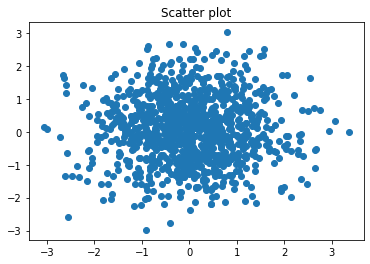

In [ ]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.title('Scatter plot')
plt.show()

          A         B
0  0.437909  0.616444
1  0.586950  0.021310
2  0.542868  0.690769
3  0.281603  0.064871
4  0.521301  0.597717
5  0.898662  0.191479
6  0.552739  0.475876
7  0.300458  0.133917
8  0.105966  0.789737
9  0.370053  0.114692


<AxesSubplot:xlabel='A', ylabel='B'>

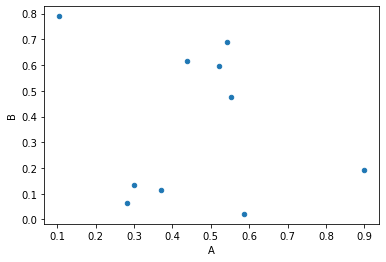

In [ ]:
df = pd.DataFrame(np.random.rand(10,2), columns=['A', 'B'])
print(df)
df.plot.scatter(x='A', y='B')

### 改變邊緣顏色及透明度

Text(0.5, 1.0, 'Scatter plot')

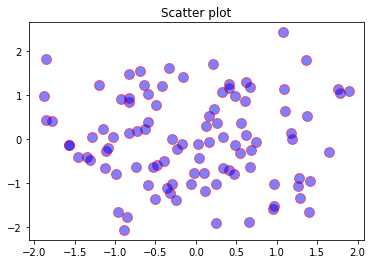

In [ ]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.scatter(X, Y, color='b', alpha=0.5, s=100, edgecolors='red')
plt.title('Scatter plot')
plt.show()

### 給定顏色與圖形形狀

* 產出數值介於 0~10 的 array，並以 0.4 為間隔，畫出y=x, y=x², y=x³ 的圖表
* r 代表紅色、兩個-代表虛線，b代表藍色、s代表方塊，g代表綠色、^代表三角形

t: [0.  0.7 1.4 2.1 2.8 3.5 4.2 4.9 5.6 6.3 7.  7.7 8.4 9.1 9.8]


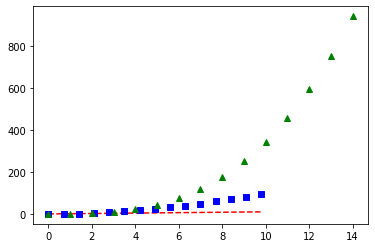

In [ ]:
t = np.arange(0., 10., 0.7)
print('t: '+str(t))

plt.plot(t, t, 'r--', t, t**2, 'bs', t**3, 'g^' )
plt.show()

## 長條圖：Bar Plots

* 用 plt.bar 及 plt.scatter 裡面放資料
* 呈現兩個維度的資料
* 適用：不同種類資料，在不同時間點的變化
* 實際應用：人口成長變化
* 函數：`.plot.bar()`

<BarContainer object of 15 artists>

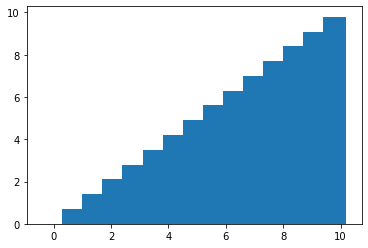

In [ ]:
x = np.arange(0., 10., 0.7)
y = np.arange(0., 10., 0.7)

plt.bar(x, y)
plt.show()

          A         B
0  0.181691  0.057709
1  0.088884  0.112641
2  0.488628  0.157429
3  0.168211  0.241498
4  0.174164  0.118663
5  0.781993  0.827120
6  0.090708  0.641967
7  0.257485  0.774868
8  0.185353  0.369410
9  0.689093  0.771701


<AxesSubplot:>

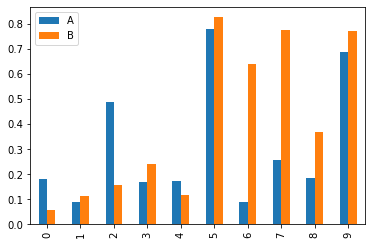

In [ ]:
df = pd.DataFrame(np.random.rand(10,2), columns=['A', 'B'])
print(df)
df.plot.bar()

<AxesSubplot:>

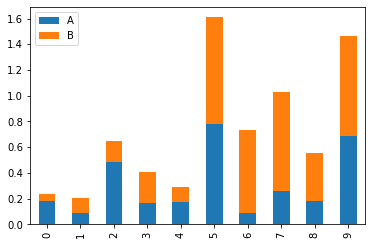

In [ ]:
df.plot.bar(stacked=True)

## 圓餅圖：Pie Plots

* 適用：呈現不同種類資料，在整體資料所佔比例
* 實際應用：記帳

* 函數：.plot.pie()
* 參數
  * index：圓餅圖的類別
  * name：圓餅圖的名稱

A    0.503109
B    0.436785
C    0.338964
D    0.626323
Name: title, dtype: float64


<AxesSubplot:ylabel='title'>

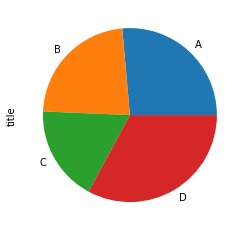

In [ ]:
df = pd.Series(np.random.rand(4), index=['A','B','C','D'], name='title')
print(df)
df.plot.pie()

## 箱型圖

* 適用：完整呈現數值分布的統計圖表
* 實際應用：薪資水平

* 函數：.boxplot()
* 參數
  * index：x軸

          A         B
0  0.198593  0.904121
1  0.136961  0.128358
2  0.349710  0.567436
3  0.883741  0.476457
4  0.933853  0.568376
5  0.696901  0.892731
6  0.786649  0.850392
7  0.676893  0.107347
8  0.859621  0.633451
9  0.957971  0.425174


<AxesSubplot:>

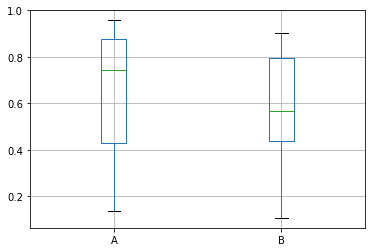

In [ ]:
df = pd.DataFrame(np.random.rand(10,2), columns=['A','B'])
print(df)
df.boxplot()

## 折線圖

* 適用：會隨時間變動的值
* 實際應用：匯率
* 函數：.plot()

2020-01-01    2.331207
2020-01-02    2.675273
2020-01-03    2.890494
2020-01-04    4.108164
2020-01-05    4.392832
                ...   
2020-07-14    2.403536
2020-07-15    3.466463
2020-07-16    3.909138
2020-07-17    4.559808
2020-07-18    5.187198
Freq: D, Length: 200, dtype: float64


<AxesSubplot:>

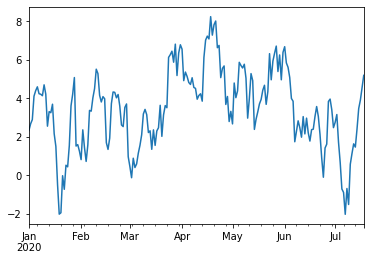

In [ ]:
ts = pd.Series(np.random.randn(200), index=pd.date_range('1/1/2020', periods=200))
ts = ts.cumsum()
print(ts)
ts.plot()

                   A         B         C
2020-01-01  1.418016  0.438517 -1.479041
2020-01-02 -1.043676  0.169908 -0.392693
2020-01-03 -0.398110  3.074778  1.735726
2020-01-04 -1.835921  2.405744  2.275415
2020-01-05 -2.006389  3.438463  2.668492
...              ...       ...       ...
2020-07-14 -8.888479 -7.863655 -1.991742
2020-07-15 -8.918996 -7.132656 -2.560454
2020-07-16 -7.831556 -6.877029 -3.358135
2020-07-17 -8.765118 -5.709589 -2.439555
2020-07-18 -7.840401 -6.998813 -2.574744

[200 rows x 3 columns]


<AxesSubplot:>

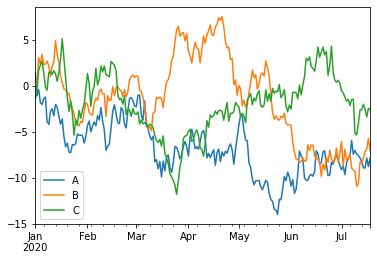

In [ ]:
#多個折線圖同時畫出
df = pd.DataFrame(np.random.randn(200, 3), index=pd.date_range('1/1/2020', periods=200), columns=['A','B','C'])
df = df.cumsum()
print(df)
df.plot()

## 參考資料

* [解決視覺化套件中文顯示問題](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)
* [從 pandas 開始 Python 與資料科學之旅](https://medium.com/datainpoint/%E5%BE%9E-pandas-%E9%96%8B%E5%A7%8B-python-%E8%88%87%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E4%B9%8B%E6%97%85-8dee36796d4a)
* [Python 基礎資料視覺化—Matplotlib](https://medium.com/@yuhsuan_chou/python-%E5%9F%BA%E7%A4%8E%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96-matplotlib-401da7d14e04)